In [15]:
#import paskages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#load data
df = pd.read_csv(r"C:/Users/ASUS/Downloads/Advanced Python Assingment/honeyproduction 1998-2021.csv")
df

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
980,Virginia,6000.0,40,240000.0,79000.0,8.23,1975000.0,2021
981,Washington,96000.0,32,3072000.0,1206000.0,2.52,7741000.0,2021
982,West Virginia,6000.0,43,258000.0,136000.0,4.80,1238000.0,2021
983,Wisconsin,42000.0,47,1974000.0,750000.0,2.81,5547000.0,2021


In [3]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


In [4]:
df.shape

(985, 8)

In [5]:
# Display  first few rows
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [6]:
# Check for missing values
df.isnull().sum()

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [7]:
# Convert the Year column in datatime format
df['year'] = pd.to_datetime(df['year'])

**Q1) How has honey production yield changed from 1998 to 2021?**

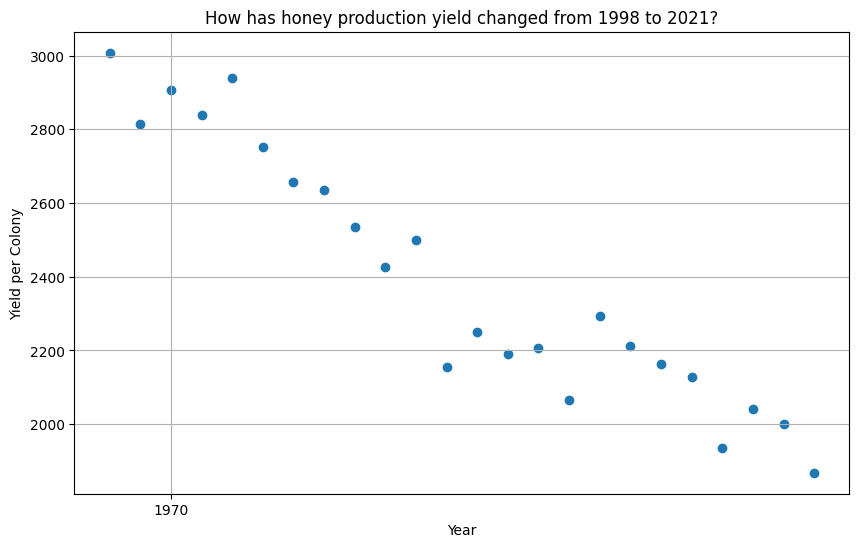

In [8]:
per_year = df.groupby('year')['yieldpercol'].sum().reset_index()

# Visualize the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x=per_year['year'], y=per_year['yieldpercol'])
plt.title("How has honey production yield changed from 1998 to 2021?")
plt.xlabel('Year')
plt.ylabel('Yield per Colony')
plt.grid(True)
plt.show()

**Q2) Over time, what are the major production trends across the
  states?**

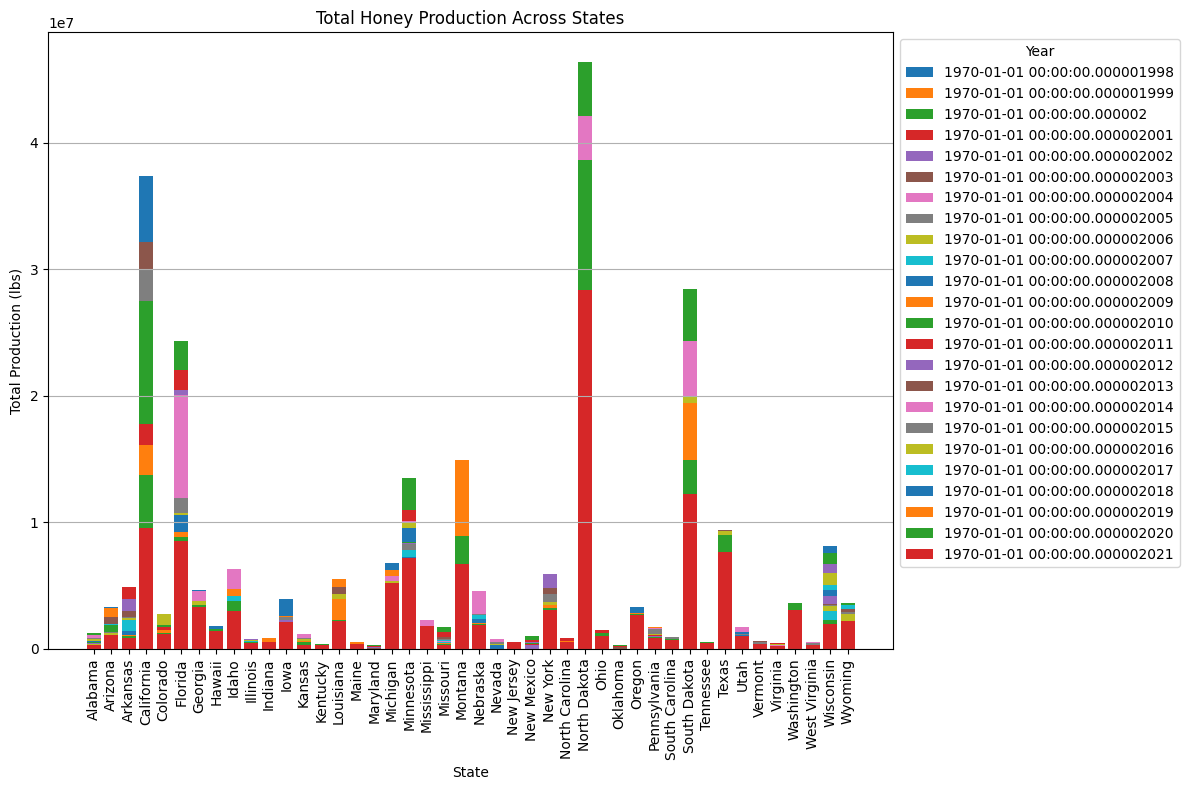

In [9]:
# Group by State, year and sum the total production for each city
state_year_df = df.groupby(['State', 'year'])['totalprod'].sum().reset_index()

# Arranging the years as rows, states as columns, and total production as values
state_year_pivot = state_year_df.pivot(index='State', columns='year', values='totalprod')

# Plotting a grouped bar plot for each state's total production for each year
plt.figure(figsize=(12, 8))

# Loop through each year and plot the total production for each state
for year in state_year_pivot.columns:
    plt.bar(state_year_pivot.index, state_year_pivot[year], label=str(year))

# Plotting
plt.xlabel('State')
plt.ylabel('Total Production (lbs)')
plt.title('Total Honey Production Across States')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Q3) Does the data show any trends in terms of the number of
honey-producing colonies and yield per colony before 2006, which
was when concern over Colony Collapse Disorder spread nationwide?**

In [59]:
# filtered to include only the data for years before 2006
pre_2006_data = df[df['year']<2006]
#Grouping Number of colonies and Yield per colony according to the Year
d2 = pre_2006_data.groupby('year')[['numcol','yieldpercol']].sum()


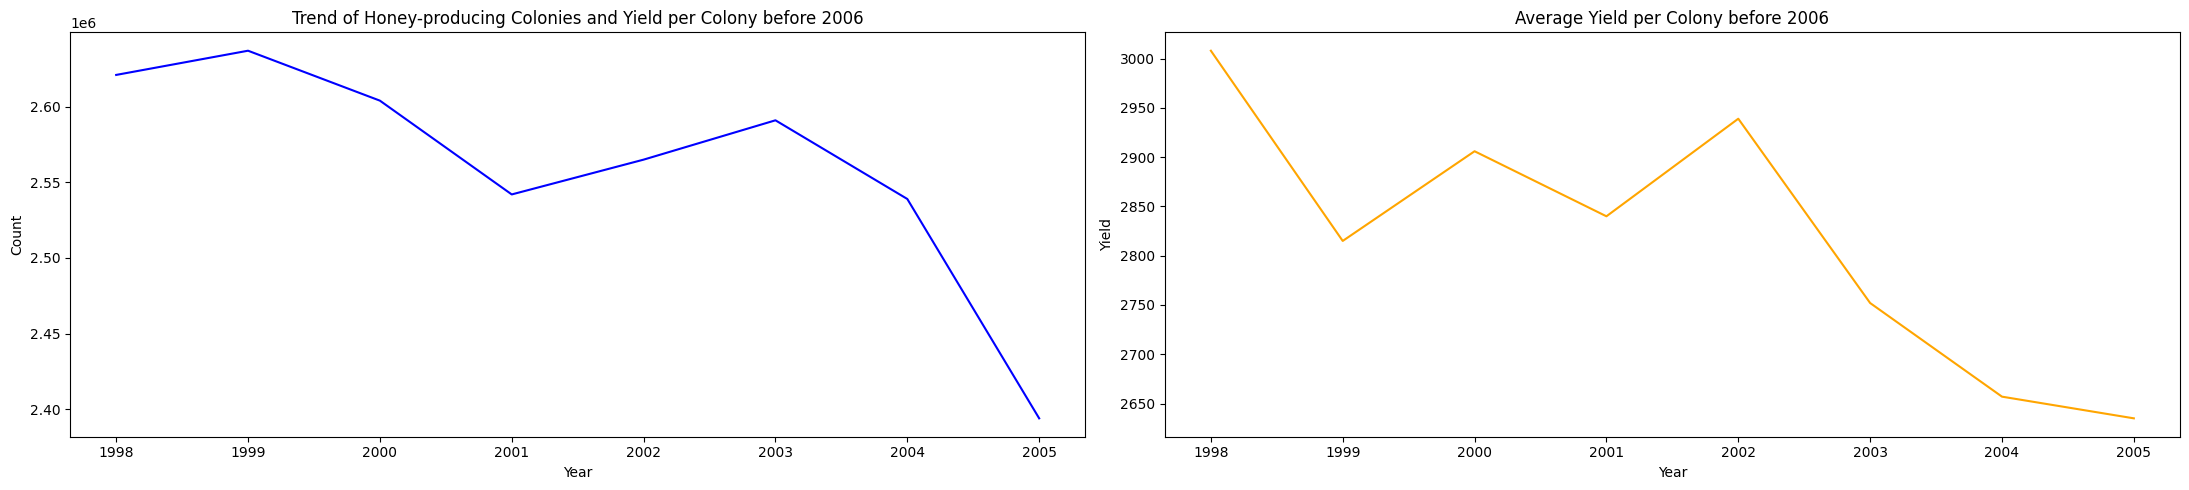

In [54]:
# Create a figure
fig = plt.figure(figsize=(22, 5))

# Plotting the trend of the average number of colonies and the average yield per colony before 2006
sub1 = fig.add_subplot(1, 2, 1)
sub1.plot(d2.index, d2['numcol'], label='Number of Colonies', color='blue')
sub1.set_title('Trend of Honey-producing Colonies and Yield per Colony before 2006')
sub1.set_xlabel('Year')
sub1.set_ylabel('Count')
# Plotting the average yield per colony before 2006
sub2 = fig.add_subplot(1, 2, 2)
sub2.plot(d2.index, d2['yieldpercol'], label='Yield per Colony', color='orange')
sub2.set_title('Average Yield per Colony before 2006')
sub2.set_xlabel('Year')
sub2.set_ylabel('Yield')

plt.tight_layout()
plt.show()


**Q4)Are there any patterns that can be observed between total honey
production and the value of production every year?**

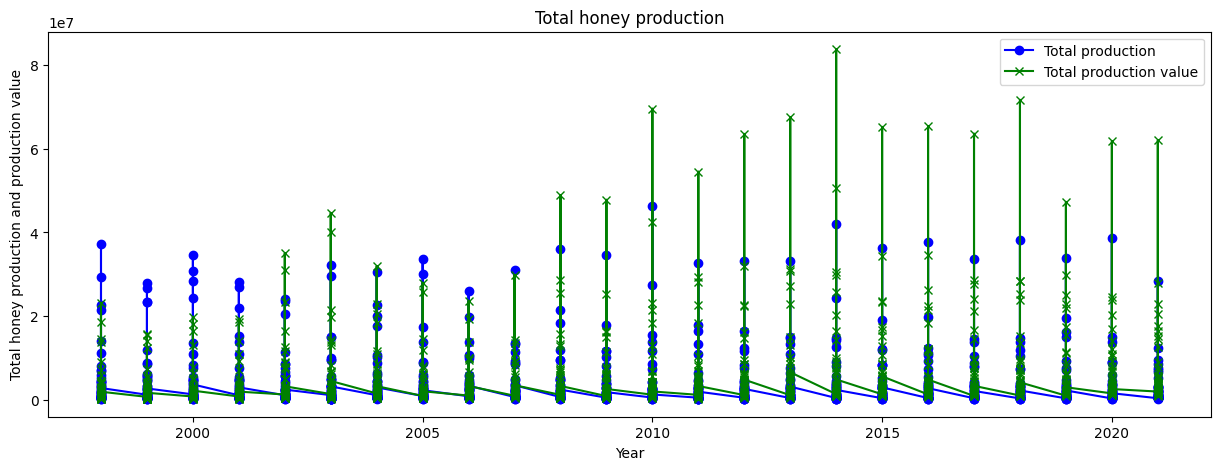

In [64]:
# Comparison between total honey production and total production value over the years
# Creates two line plot into one using  sub-plot function
fig, ax = plt.subplots(figsize = (15,5))

ax.plot(df['year'], df['totalprod'], label ='Total production',marker='o', color='blue')
ax.plot(df['year'], df['prodvalue'], label ='Total production value',marker='x', color='green')

ax.set_xlabel('Year')
ax.set_ylabel('Total honey production and production value')
ax.set_title('Total honey production')
ax.legend()
plt.show()

**Q5)How has the value of production, which in some sense could be
tied to demand, changed every year?**


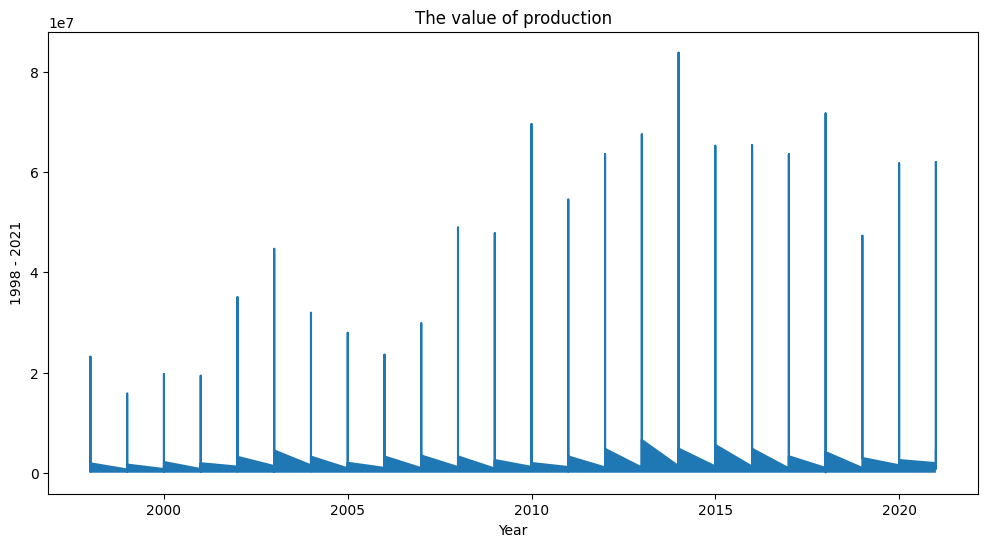

In [31]:
#  Illustrate the trend in the value of honey production from 1998 to 2021
plt.figure(figsize=(12,6))
df['total_value'] = df['numcol'] * df['yieldpercol'] * df['priceperlb']
plt.plot(df['year'],df['total_value'])
plt.fill_between(df['year'], df['total_value'])
plt.title('The value of production')
plt.xlabel('Year')
plt.ylabel('1998 - 2021')
plt.show()

**Q6)Construct the related plots using Seaborn and Matplot apply
customization and derive insights from the visualization**

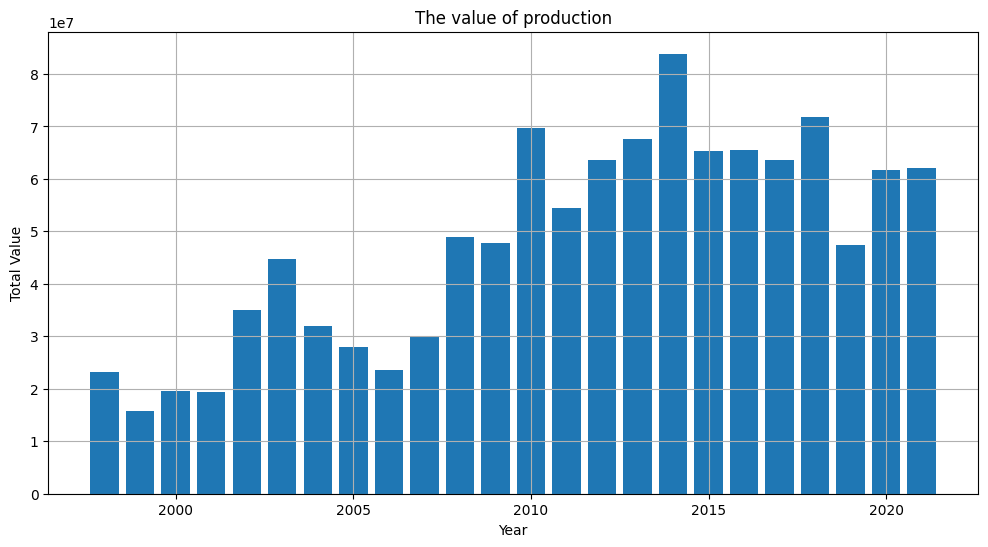

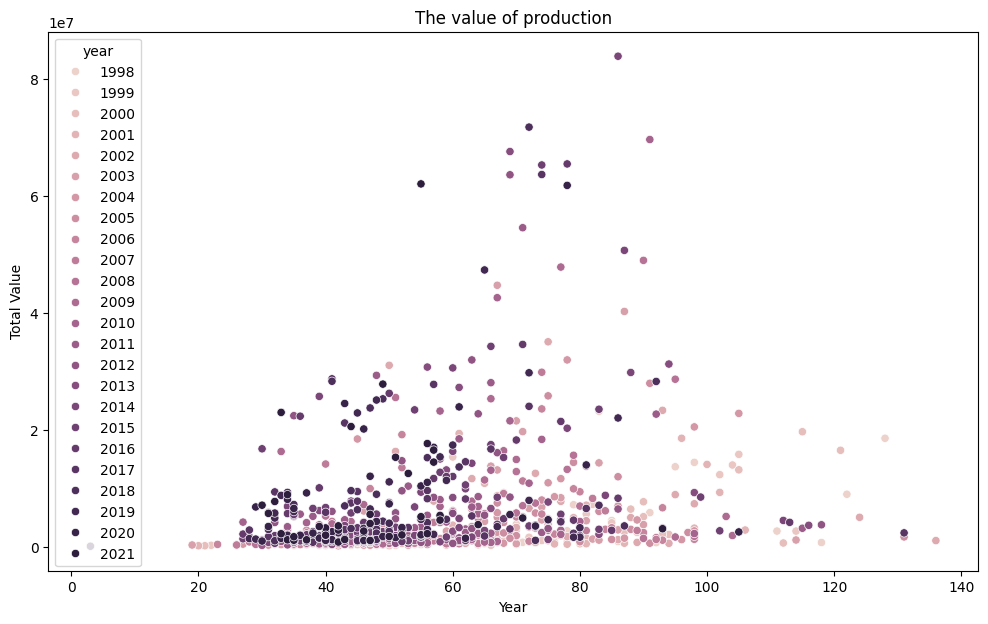

In [85]:
# Provide insight about the trends and relationships within the honey production dataset
df['total_value'] = df['numcol'] * df['yieldpercol'] * df['priceperlb']

# Visualize the line plot using Seaborn
plt.figure(figsize=(12,6))
plt.bar(df['year'], df['total_value'], label='Total Value')
plt.title('The value of production')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

# Visualize the scatter plot using Seaborn
plt.figure(figsize=(12,7))
sns.scatterplot(data = df, x = 'yieldpercol', y = 'total_value', hue = 'year' , legend = 'full')
plt.title('The value of production')
plt.xlabel('Year')
plt.ylabel('Total Value')

plt.show()

**Conclusion :-**
Over the years, honey production yield has steadily decreased. North Dakota, South Dakota, and California lead in production, yet exhibit declining trends. Before 2006, both yield per colony and the number of colonies decreased. Strong positive correlation exists between total production and its value, peaking in 2014, followed by a decline.